# Practice Lab: Decision Trees

We will implement a decision tree from scratch and apply it to the task of classifying whether a mushroom is edible or poisonous.
# Outline
- [ 1 - Packages ](#1)
- [ 2 -  Problem Statement](#2)
- [ 3 - Dataset](#3)
  - [ 3.1 One hot encoded dataset](#3.1)
- [ 4 - Decision Tree Refresher](#4)
  - [ 4.1  Calculate entropy](#4.1)
    - [ Exercise 1](#ex01)
  - [ 4.2  Split dataset](#4.2)
    - [ Exercise 2](#ex02)
  - [ 4.3  Calculate information gain](#4.3)
    - [ Exercise 3](#ex03)
  - [ 4.4  Get best split](#4.4)
    - [ Exercise 4](#ex04)
- [ 5 - Building the tree](#5)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

<a name="2"></a>
## 2 -  Problem Statement

Suppose you are starting a company that grows and sells wild mushrooms. 
- Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on it's physical attributes
- You have some existing data that you can use for this task. 

Can you use the data to help you identify which mushrooms can be sold safely? 

Note: The dataset used is for illustrative purposes only. It is not meant to be a guide on identifying edible mushrooms.

<a name="3"></a>
## 3 - Dataset

We will start by loading the dataset for this task. The dataset we have collected is as follows:

|                                                     | Cap Color | Stalk Shape | Solitary | Edible |
|:---------------------------------------------------:|:---------:|:-----------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    Yes   |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |    Red    |  Enlarging  |    No    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    No    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |


-  You have 10 examples of mushrooms. For each example, you have
    - Three features
        - Cap Color (`Brown` or `Red`),
        - Stalk Shape (`Tapering (as in \/)` or `Enlarging (as in /\)`), and
        - Solitary (`Yes` or `No`)
    - Label
        - Edible (`1` indicating yes or `0` indicating poisonous)

<a name="3.1"></a>
### 3.1 One hot encoded dataset
For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features)

|                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |


Therefore,
- `X_train` contains three features for each example 
    - Brown Color (A value of `1` indicates "Brown" cap color and `0` indicates "Red" cap color)
    - Tapering Shape (A value of `1` indicates "Tapering Stalk Shape" and `0` indicates "Enlarging" stalk shape)
    - Solitary  (A value of `1` indicates "Yes" and `0` indicates "No")

- `y_train` is whether the mushroom is edible 
    - `y = 1` indicates edible
    - `y = 0` indicates poisonous

In [35]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

In [36]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


In [37]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

In [38]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


<a name="4"></a>
## 4 - Decision Tree Refresher

We will build a decision tree based on the dataset provided.

- Recall that the steps for building a decision tree are as follows:
    - Start with all examples at the root node
    - Calculate information gain for splitting on all possible features, and pick the one with the highest information gain
    - Split dataset according to the selected feature, and create left and right branches of the tree
    - Keep repeating splitting process until stopping criteria is met
  
  
- We'll implement the following functions, which will let us split a node into left and right branches using the feature with the highest information gain
    - Calculate the entropy at a node 
    - Split the dataset at a node into left and right branches based on a given feature
    - Calculate the information gain from splitting on a given feature
    - Choose the feature that maximizes information gain
    
- We'll then use the helper functions we've implemented to build a decision tree by repeating the splitting process until the stopping criteria is met 
    - The stopping criteria we've chosen is setting a maximum depth of 2

<a name="4.1"></a>
### 4.1  Calculate entropy

First, we'll write a helper function called `compute_entropy` that computes the entropy (measure of impurity) at a node. 
- The function takes in a numpy array (`y`) that indicates whether the examples in that node are edible (`1`) or poisonous(`0`) 

Complete the `compute_entropy()` function below to:
* Compute $p_1$, which is the fraction of examples that are edible (i.e. have value = `1` in `y`)
* The entropy is then calculated as 

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$
* Note 
    * The log is calculated with base $2$
    * For implementation purposes, $0\text{log}_2(0) = 0$. That is, if `p_1 = 0` or `p_1 = 1`, set the entropy to `0`
    * Make sure to check that the data at a node is not empty (i.e. `len(y) != 0`). Return `0` if it is
    
<a name="ex01"></a>
### Exercise 1

Please complete the `compute_entropy()` function using the previous instructions.

In [39]:
# UNQ_C1
# GRADED FUNCTION: compute_entropy

def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    # You need to return the following variables correctly
    entropy = 0.
    
    ### START CODE HERE ###
    if len(y) == 0  :
        return 0
    else:
        p = len(y[y==1])/len(y)
        if p == 0 or p == 1:
            return 0
        else: 
            entropy = -p * np.log2(p) - (1- p)*np.log2(1 - p) 
    ### END CODE HERE ###        
    
    return entropy

In [40]:
# Compute entropy at the root node (i.e. with all examples)
# Since we have 5 edible and 5 non-edible mushrooms, the entropy should be 1"

print("Entropy at root node: ", compute_entropy(y_train)) 

Entropy at root node:  1.0


**Expected Output**:
<table>
  <tr>
    <td> <b>Entropy at root node:<b> 1.0 </td> 
  </tr>
</table>

<a name="4.2"></a>
### 4.2  Split dataset

Next, we'll write a helper function called `split_dataset` that takes in the data at a node and a feature to split on and splits it into left and right branches. Later, we'll implement code to calculate how good the split is.

- The function takes in the training data, the list of indices of data points at that node, along with the feature to split on. 
- It splits the data and returns the subset of indices at the left and the right branch.
- For example, say we're starting at the root node (so `node_indices = [0,1,2,3,4,5,6,7,8,9]`), and we chose to split on feature `0`, which is whether or not the example has a brown cap. 
    - The output of the function is then, `left_indices = [0,1,2,3,4,7,9]` (data points with brown cap) and `right_indices = [5,6,8]` (data points without a brown cap)
    
    
|       |                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|-------|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| 0     | <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 1     | <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 2     | <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 3     | <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 4     | <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 5     | <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| 6     | <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| 7     | <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 8     | <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| 9     | <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
    
<a name="ex02"></a>
### Exercise 2

Please complete the `split_dataset()` function shown below

- For each index in `node_indices`
    - If the value of `X` at that index for that feature is `1`, add the index to `left_indices`
    - If the value of `X` at that index for that feature is `0`, add the index to `right_indices`

In [41]:
# UNQ_C2
# GRADED FUNCTION: split_dataset

def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    
    # You need to return the following variables correctly
    left_indices = []
    right_indices = []
    
    ### START CODE HERE ###
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    ### END CODE HERE ###
        
    return left_indices, right_indices

Let's try splitting the dataset at the root node, which contains all examples at feature 0 (Brown Cap) as we'd discussed above.

In [42]:
def generate_split_viz(node_indices, left_indices, right_indices, feature):
    import matplotlib.pyplot as plt
    import networkx as nx
    from networkx.drawing.nx_agraph import graphviz_layout

    G = nx.DiGraph()

    # Liste des indices à afficher (racine, gauche, droite)
    indices_list = [node_indices, left_indices, right_indices]

    # Création des noeuds avec leur image
    for idx, indices in enumerate(indices_list):
        G.add_node(idx, image=generate_node_image(indices))

    # Ajout des arêtes entre le noeud racine et ses deux enfants
    G.add_edge(0, 1)
    G.add_edge(0, 2)

    # Positionnement des noeuds avec graphviz
    pos = nx.spring_layout(G)


    # Création de la figure
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G, pos, ax=ax, arrows=True, arrowsize=40)

    # Conversion des coordonnées pour bien placer les images
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform

    # Choix du nom de la caractéristique
    feature_names = ["Brown Cap", "Tapering Stalk Shape", "Solitary"]
    feature_name = feature_names[feature]
    ax_names = [
        f"Splitting on {feature_name}",
        f"Left: {feature_name} = 1",
        f"Right: {feature_name} = 0"
    ]

    # Affichage des noeuds avec image et titre
    for idx, n in enumerate(G.nodes):
        xx, yy = trans(pos[n])
        xa, ya = trans2((xx, yy))
        piesize = len(indices_list[idx]) / 9
        p2 = piesize / 2.0
        a = plt.axes([xa - p2, ya - p2, piesize, piesize])
        a.set_aspect('equal')
        a.imshow(G.nodes[n]['image'])
        a.axis('off')
        a.set_title(ax_names[idx])

    ax.axis('off')
    plt.show()


CASE 1:
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]


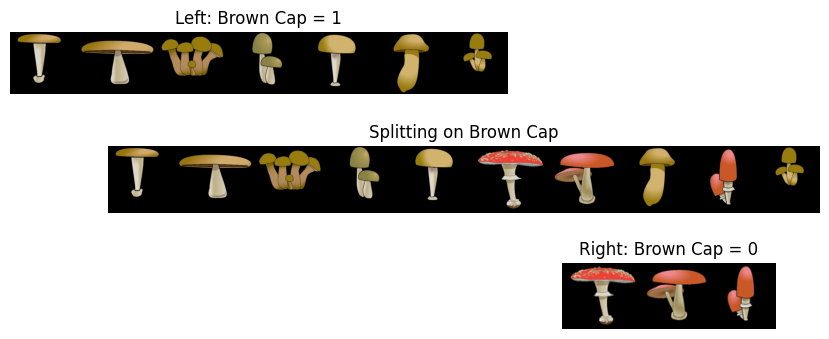


CASE 2:
Left indices:  [0, 2, 4]
Right indices:  [6, 8]


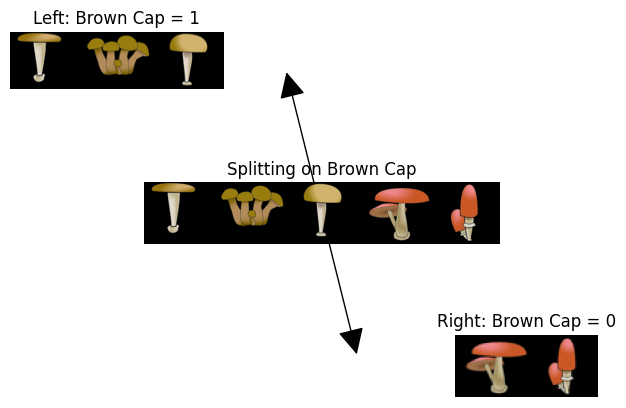

In [43]:
# Case 1

root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("CASE 1:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split 
generate_split_viz(root_indices, left_indices, right_indices, feature)

print()

# Case 2

root_indices_subset = [0, 2, 4, 6, 8]
left_indices, right_indices = split_dataset(X_train, root_indices_subset, feature)

print("CASE 2:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split 
generate_split_viz(root_indices_subset, left_indices, right_indices, feature)

**Expected Output**:
```
CASE 1:
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]

CASE 2:
Left indices:  [0, 2, 4]
Right indices:  [6, 8]
```

<a name="4.3"></a>
### 4.3  Calculate information gain

Next, we'll write a function called `information_gain` that takes in the training data, the indices at a node and a feature to split on and returns the information gain from the split.
<a name="ex03"></a>
### Exercise 3

Please complete the `compute_information_gain()` function shown below to compute

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch, respectively

Note:
- You can use the `compute_entropy()` function that you implemented above to calculate the entropy
- We've provided some starter code that uses the `split_dataset()` function you implemented above to split the dataset 

In [44]:
# UNQ_C3
# GRADED FUNCTION: compute_information_gain

def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        feature (int):           Index of feature to split on
   
    Returns:
        cost (float):        Cost computed
    
    """    
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

   # You need to return the following variables correctly
    information_gain = 0

   ### START CODE HERE ###
    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)

    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)
    
    weighted_entropy = w_left * left_entropy + w_right * right_entropy

    information_gain = node_entropy - weighted_entropy
    ### END CODE HERE ###  
    
    return information_gain

In [45]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)


Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377


**Expected Output**:
```
Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
```

Splitting on "Solitary" (feature = 2) at the root node gives the maximum information gain. Therefore, it's the best feature to split on at the root node.

<a name="4.4"></a>
### 4.4  Get best split
Now let's write a function to get the best feature to split on by computing the information gain from each feature as we did above and returning the feature that gives the maximum information gain

<a name="ex04"></a>
### Exercise 4
Please complete the `get_best_split()` function shown below.
- The function takes in the training data, along with the indices of datapoint at that node
- The output of the function is the feature that gives the maximum information gain 
    - You can use the `compute_information_gain()` function to iterate through the features and calculate the information for each feature

In [46]:
# UNQ_C4
# GRADED FUNCTION: get_best_split

def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    
    
    # Some useful variables
    num_features = X.shape[1]
    
    # You need to return the following variables correctly
    best_feature = -1
    
    ### START CODE HERE ###
    ### START CODE HERE ###
    max_info_gain = 0

   # Iterate through all features
    for feature in range(num_features): 

       # Your code here to compute the information gain from splitting on this feature
       info_gain = compute_information_gain(X, y, node_indices, feature)

       # If the information gain is larger than the max seen so far
       if info_gain > max_info_gain:  
           # Your code here to set the max_info_gain and best_feature
           max_info_gain = info_gain
           best_feature = feature
   ### END CODE HERE ##       
    return best_feature

In [47]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

Best feature to split on: 2


As we saw above, the function returns that the best feature to split on at the root node is feature 2 ("Solitary")

<a name="5"></a>
## 5 - Building the tree

In this section, we use the functions you implemented above to generate a decision tree by successively picking the best feature to split on until we reach the stopping criteria (maximum depth is 2).


In [48]:
# Not graded
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [56]:
def generate_tree_viz(root_indices, y, tree):
    
    G=nx.DiGraph()
    
    
    G.add_node(0,image= generate_node_image(root_indices))
    idx = 1
    root = 0
    
    num_images = [len(root_indices)]
    
    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"]
    y_name = ["Poisonous","Edible"]
    
    decision_names = []
    leaf_names = []
    
    for i, level in enumerate(tree):
        indices_list = level[:2]
        for indices in indices_list:
            G.add_node(idx,image= generate_node_image(indices))
            G.add_edge(root, idx)
            
            # For visualization
            num_images.append(len(indices))
            idx += 1
            if i > 0:
                leaf_names.append("Leaf node: %s" % y_name[max(y[indices])])
            
        decision_names.append("Split on: %s" % feature_name[level[2]])
        root += 1
    
    
    node_names = decision_names + leaf_names
    pos = nx.spring_layout(G)
    fig=plt.figure(figsize=(14, 10))
    ax=plt.subplot(111)
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G,pos,ax=ax, arrows=True, arrowsize=40)
    
    trans=ax.transData.transform
    trans2=fig.transFigure.inverted().transform

    for idx, n in enumerate(G):
        xx,yy=trans(pos[n]) # figure coordinates
        xa,ya=trans2((xx,yy)) # axes coordinates
        piesize = num_images[idx]/25
        p2=piesize/2.0
        a = plt.axes([xa-p2,ya-p2, piesize, piesize])
        a.set_aspect('equal')
        a.imshow(G.nodes[n]['image'])
        a.axis('off')
        a.set_title(node_names[idx], y=-0.8, fontsize=13, loc="left")
    ax.axis('off')
    plt.show()

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


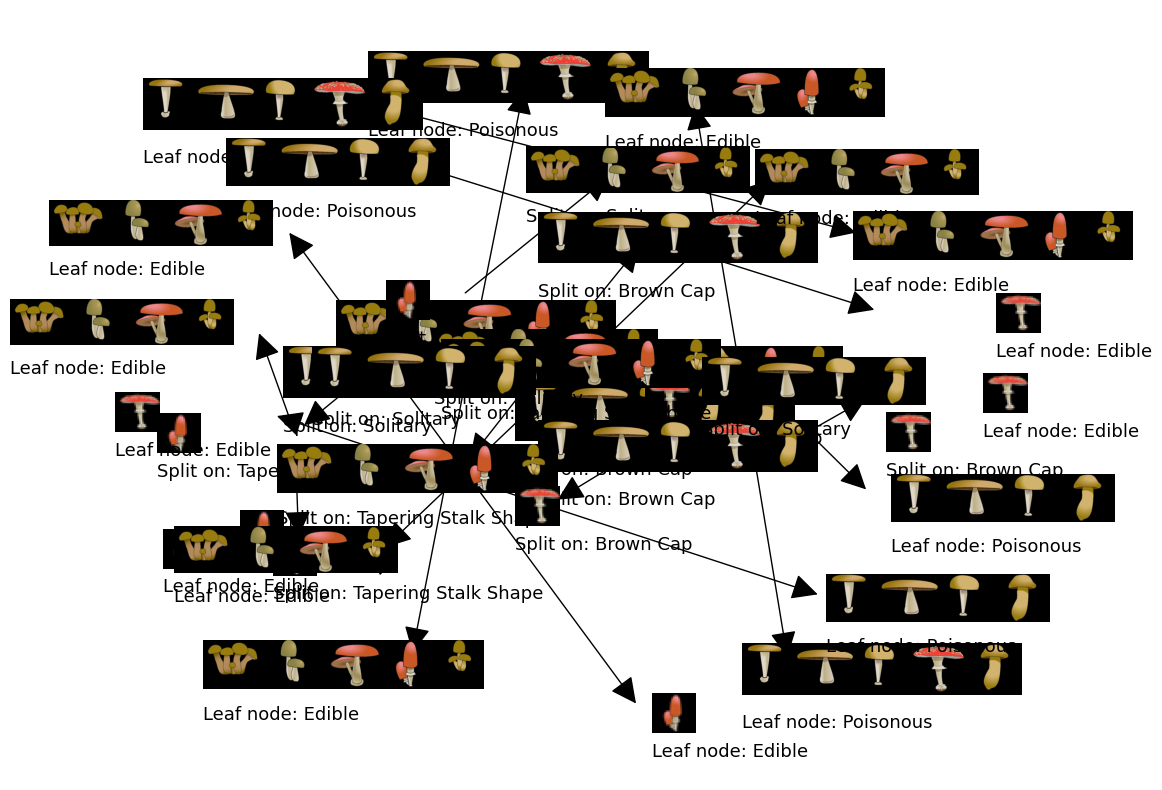

In [57]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
generate_tree_viz(root_indices, y_train, tree)